In [22]:
#data and lib import
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from model_tf_1 import model_1
from model_tf_2 import model_2


# Read the original and edited training data into Pandas DataFrames
trainED = pd.read_csv("../Data/Data.csv.gz", compression="gzip")
test = pd.read_csv("../Data/test.csv.gz", compression="gzip")

In [23]:
# Exclude 'Image' column
#numeric_cols = trainED.columns[:-1]

# Scale the numeric columns to (0, 96)
#trainED[numeric_cols] = (trainED[numeric_cols] + 1) * 48


# Save the modified DataFrame to a new CSV file
#trainED.to_csv('Data.csv', index=False)

In [24]:
#X_test = np.array([np.fromstring(x, dtype=int, sep=' ') for x in test['Image']])
#X_test = X_test.reshape(-1, 96, 96, 1) / 255.0

#mED,nED = trainED.shape
#img_size = 96

#imgED = []
#for i in range(mED):
 #   spliting = np.array(trainED['Image'][i].split(' '),dtype = 'float64')
  #  splitting = np.reshape(spliting,(img_size,img_size,1))
   # splitting /= 255 
    #imgED.append(splitting)
#imgED = np.array(imgED)

#X_trainED = imgED
#trainED.drop('Image', axis = 1, inplace = True)
#y_trainED = []

#for i in range(len(trainED)):
 #   yED = trainED.iloc[i,:].values
  #  y_trainED.append(yED)    
    
#y_trainED= np.array(y_trainED, dtype = 'float')

In [25]:
# Assuming trainED contains both X and y data
# Split the data into X and y
X = np.array([np.fromstring(x, dtype=float, sep=' ') for x in trainED['Image']])
y = np.array(trainED.drop('Image', axis=1))

# Reshape X and normalize
img_size = 96
X = X.reshape(-1, img_size, img_size, 1) / 255.0

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Convert y_train to a numpy array
y_train = np.array(y_train, dtype='float32')

# Now, train and test data are split into X_train, X_test, y_train, and y_test

In [5]:
optimizer = Adam(learning_rate=0.001)
model_1.compile(optimizer=optimizer, loss=tf.keras.losses.MeanSquaredError(),metrics = [tf.keras.metrics.Precision()])
history = model_1.fit(X_train.reshape(-1, 96, 96, 1), y_train, epochs=40, batch_size=16,validation_split=0.2)

Epoch 1/40
182/182 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 1035.2429 - precision: 0.9891 - val_loss: 97.6414 - val_precision: 1.0000
Epoch 2/40
182/182 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 194.4634 - precision: 1.0000 - val_loss: 36.2171 - val_precision: 1.0000
Epoch 3/40
182/182 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 132.2719 - precision: 1.0000 - val_loss: 17.8231 - val_precision: 1.0000
Epoch 4/40
182/182 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 102.9367 - precision: 1.0000 - val_loss: 12.0491 - val_precision: 1.0000
Epoch 5/40
182/182 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 90.0116 - precision: 1.0000 - val_loss: 12.5100 - val_precision: 1.0000
Epoch 6/40
182/182 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 83.4453 - precision: 1.0000 - val_loss: 12.3990 - val_precision: 1.0000
Epoch 7/40
182/182 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 75.5442 - precision: 1.0000 - val_loss: 12.3059 - val_precision: 1.0000
Epoch 8/40
182/182 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 71

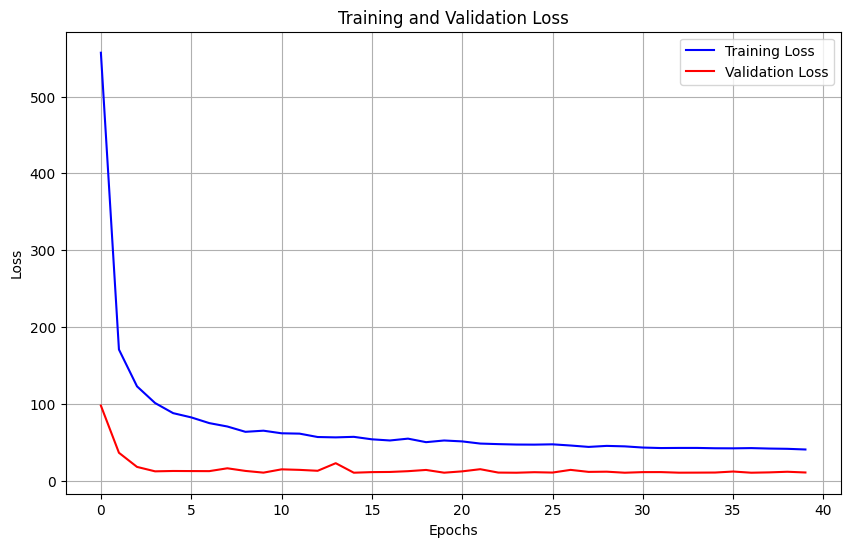

In [6]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(len(training_loss))

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
y_test_predED = model_1.predict(X_test)
model_1.save("model_edited.h5")

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


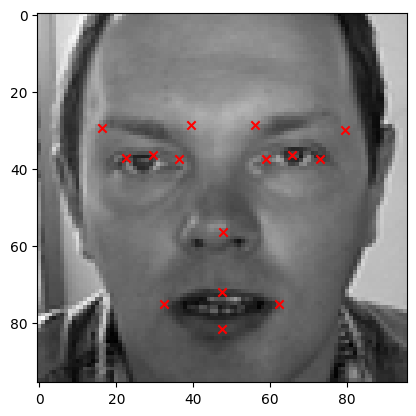

In [8]:
tED = y_test_predED[1]
plt.imshow(X_test[1], cmap='gray')
plt.scatter(tED[0::2], tED[1::2], c='red', marker='x')

In [9]:
optimizer = Adam(learning_rate=0.001)
model_2.compile(optimizer=optimizer, loss=tf.keras.losses.MeanSquaredError(),metrics = [tf.keras.metrics.Precision()])
history2 = model_2.fit(X_train.reshape(-1, 96, 96, 1), y_train, epochs=40, batch_size=16,validation_split=0.2)

Epoch 1/40
182/182 ━━━━━━━━━━━━━━━━━━━━ 61s 307ms/step - loss: 2565.8059 - precision_1: 1.0000 - val_loss: 1714.3143 - val_precision_1: 1.0000
Epoch 2/40
182/182 ━━━━━━━━━━━━━━━━━━━━ 56s 306ms/step - loss: 1344.8494 - precision_1: 1.0000 - val_loss: 288.5204 - val_precision_1: 1.0000
Epoch 3/40
182/182 ━━━━━━━━━━━━━━━━━━━━ 56s 308ms/step - loss: 113.2607 - precision_1: 1.0000 - val_loss: 12.8458 - val_precision_1: 1.0000
Epoch 4/40
182/182 ━━━━━━━━━━━━━━━━━━━━ 56s 307ms/step - loss: 38.7731 - precision_1: 1.0000 - val_loss: 13.3116 - val_precision_1: 1.0000
Epoch 5/40
182/182 ━━━━━━━━━━━━━━━━━━━━ 56s 308ms/step - loss: 34.8827 - precision_1: 1.0000 - val_loss: 11.1902 - val_precision_1: 1.0000
Epoch 6/40
182/182 ━━━━━━━━━━━━━━━━━━━━ 56s 308ms/step - loss: 31.8531 - precision_1: 1.0000 - val_loss: 10.5144 - val_precision_1: 1.0000
Epoch 7/40
182/182 ━━━━━━━━━━━━━━━━━━━━ 56s 308ms/step - loss: 31.8853 - precision_1: 1.0000 - val_loss: 15.9804 - val_precision_1: 1.0000
Epoch 8/40
182/182 

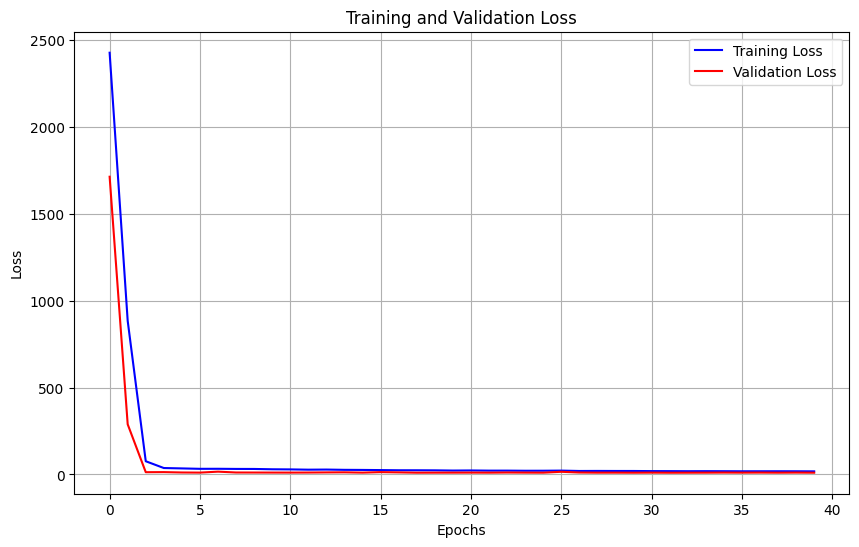

In [10]:
training_loss2 = history2.history['loss']
validation_loss2 = history2.history['val_loss']
epochs2 = range(len(training_loss2))

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs2, training_loss2, 'b', label='Training Loss')
plt.plot(epochs2, validation_loss2, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
y_test_pred2ED = model_2.predict(X_test)
model_2.save("model2_edited.h5")

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step


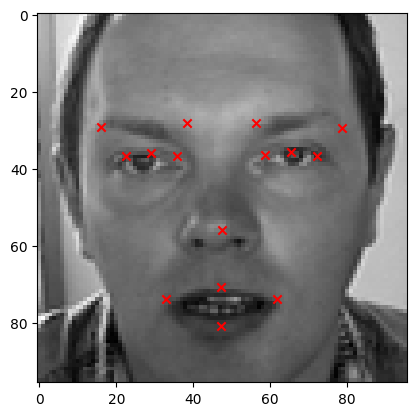

In [12]:
t2ED = y_test_pred2ED[1]
plt.imshow(X_test[1], cmap='gray')
plt.scatter(t2ED[0::2], t2ED[1::2], c='red', marker='x')

In [13]:
model_1 = tf.keras.models.load_model("model_edited.h5")
model_2 = tf.keras.models.load_model("model2_edited.h5")
y1 = model_1.predict(X_test)
y2 = model_2.predict(X_test)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step


In [14]:
test_samples =0
accurate_samples=0

for i in range(0, len(y_test)):
        test_samples+=30
        accurate_samples+=(abs(y_test[i] - y1[i])<3).sum().item()
        if(i%50==0):
            print(f"test set elements: {i}, test_samples: {test_samples}, accurate_samples: {accurate_samples} accuracy: {accurate_samples/test_samples*100}%")
print(f"test set elements: {len(y_test)}, test_samples: {test_samples}, accurate_samples: {accurate_samples} accuracy: {accurate_samples/test_samples*100}%")
    

test set elements: 0, test_samples: 30, accurate_samples: 12 accuracy: 40.0%
test set elements: 50, test_samples: 1530, accurate_samples: 1073 accuracy: 70.13071895424837%
test set elements: 100, test_samples: 3030, accurate_samples: 2166 accuracy: 71.48514851485149%
test set elements: 150, test_samples: 4530, accurate_samples: 3233 accuracy: 71.36865342163355%
test set elements: 200, test_samples: 6030, accurate_samples: 4363 accuracy: 72.35489220563848%
test set elements: 250, test_samples: 7530, accurate_samples: 5426 accuracy: 72.05843293492697%
test set elements: 300, test_samples: 9030, accurate_samples: 6571 accuracy: 72.76854928017718%
test set elements: 350, test_samples: 10530, accurate_samples: 7608 accuracy: 72.25071225071224%
test set elements: 400, test_samples: 12030, accurate_samples: 8682 accuracy: 72.16957605985037%
test set elements: 450, test_samples: 13530, accurate_samples: 9825 accuracy: 72.61640798226165%
test set elements: 500, test_samples: 15030, accurate_sam

In [15]:
test_samples =0
accurate_samples=0

for i in range(0, len(y_test)):
        test_samples+=30
        accurate_samples+=(abs(y_test[i] - y2[i])<3).sum().item()
        if(i%50==0):
            print(f"test set elements: {i}, test_samples: {test_samples}, accurate_samples: {accurate_samples} accuracy: {accurate_samples/test_samples*100}%")
print(f"test set elements: {len(y_test)}, test_samples: {test_samples}, accurate_samples: {accurate_samples} accuracy: {accurate_samples/test_samples*100}%")

test set elements: 0, test_samples: 30, accurate_samples: 14 accuracy: 46.666666666666664%
test set elements: 50, test_samples: 1530, accurate_samples: 1085 accuracy: 70.91503267973856%
test set elements: 100, test_samples: 3030, accurate_samples: 2192 accuracy: 72.34323432343234%
test set elements: 150, test_samples: 4530, accurate_samples: 3269 accuracy: 72.16335540838853%
test set elements: 200, test_samples: 6030, accurate_samples: 4370 accuracy: 72.4709784411277%
test set elements: 250, test_samples: 7530, accurate_samples: 5445 accuracy: 72.31075697211156%
test set elements: 300, test_samples: 9030, accurate_samples: 6596 accuracy: 73.04540420819491%
test set elements: 350, test_samples: 10530, accurate_samples: 7625 accuracy: 72.41215574548909%
test set elements: 400, test_samples: 12030, accurate_samples: 8711 accuracy: 72.41064006650042%
test set elements: 450, test_samples: 13530, accurate_samples: 9861 accuracy: 72.88248337028826%
test set elements: 500, test_samples: 15030,

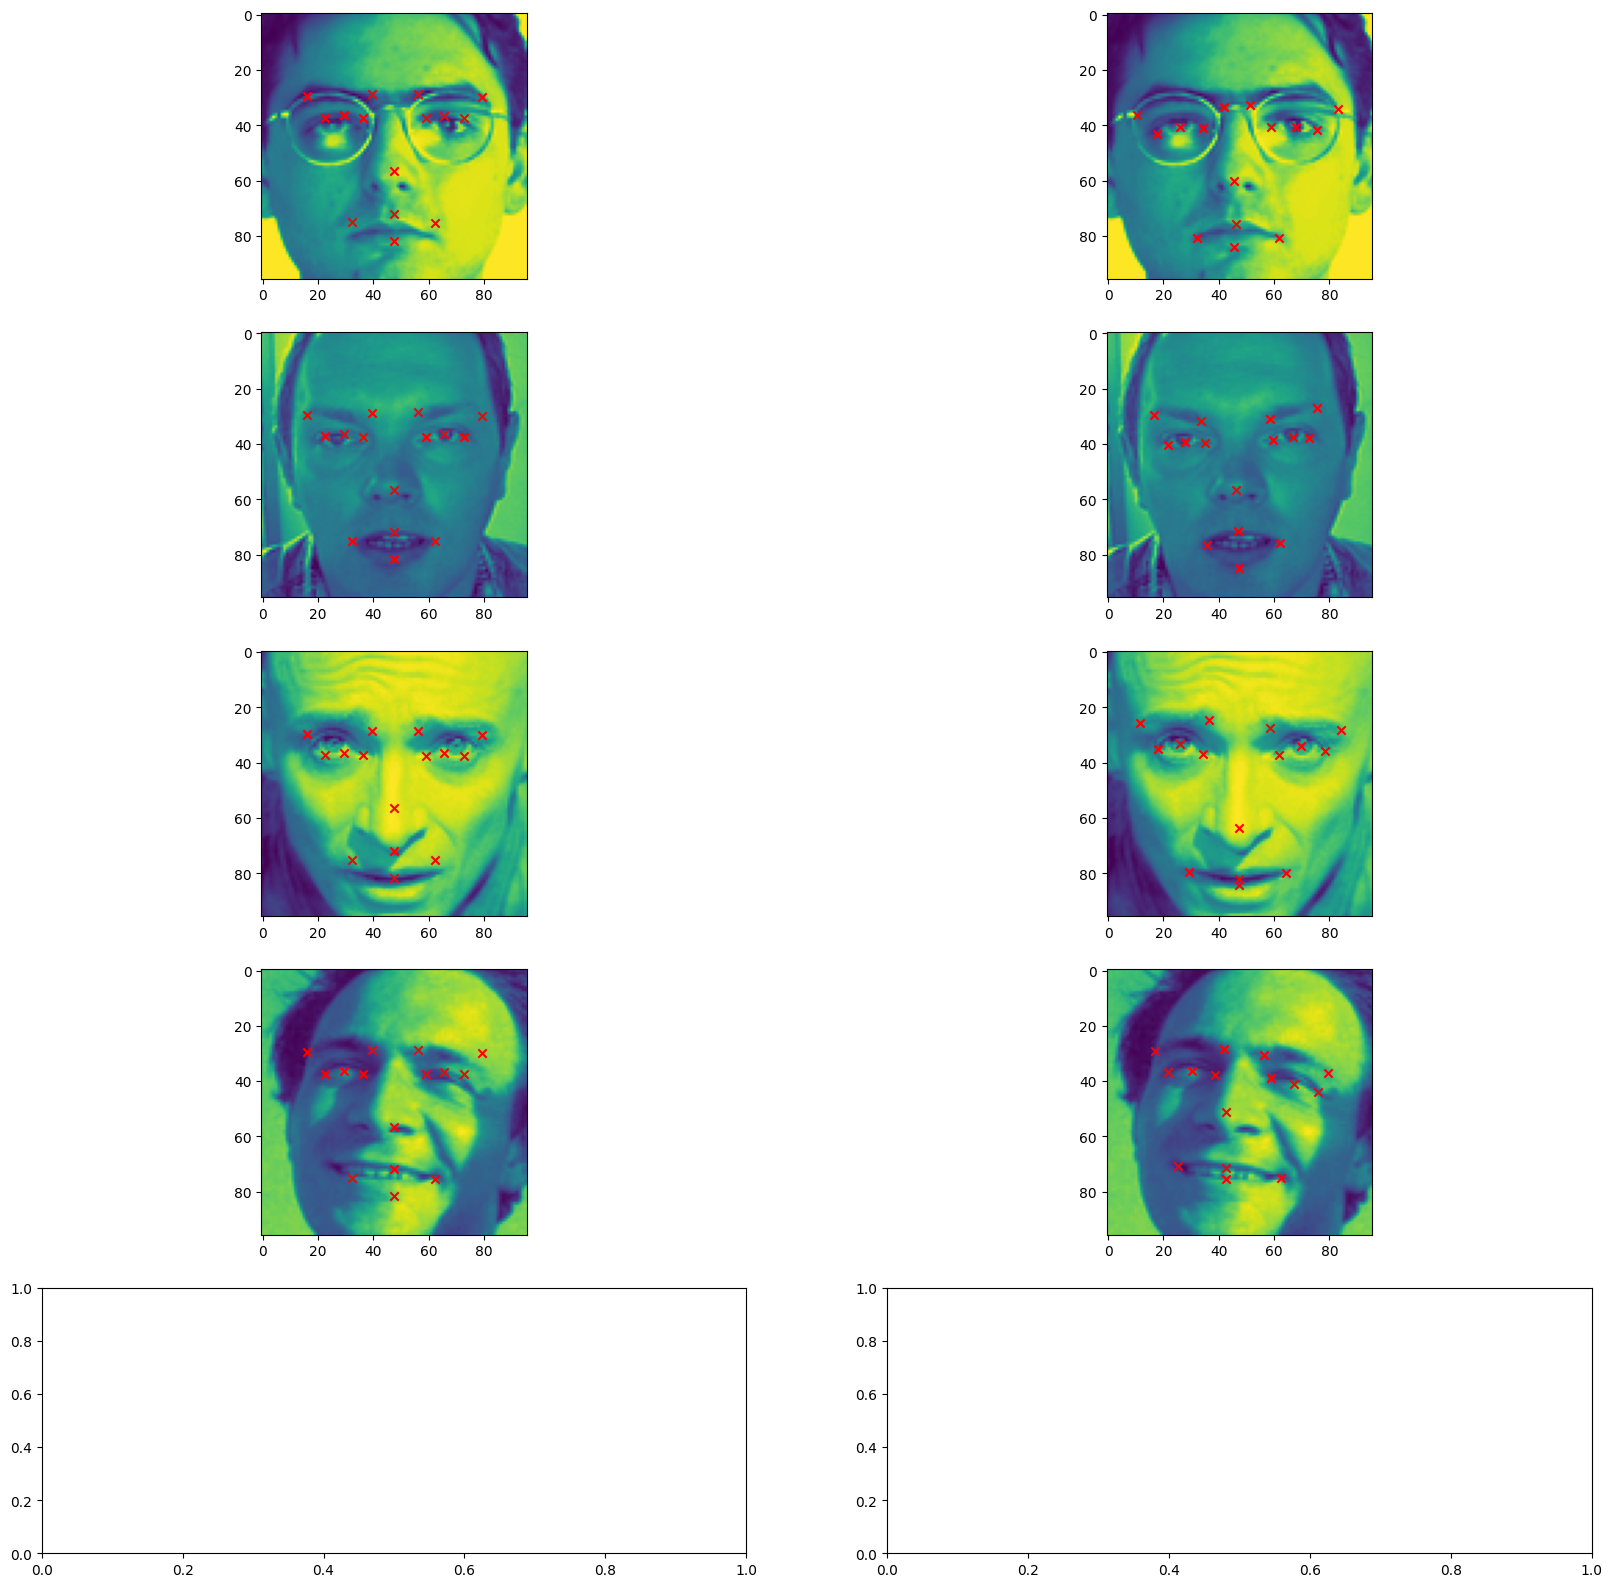

In [29]:
fig,ax=plt.subplots(nrows=5,ncols=2,figsize=(20,20))
for i in range(4):
    Pred=y1[i]
    Actual= y_test[i]
    Im=X_test[i]
    ax[i,0].imshow(Im)
    ax[i,1].imshow(Im)          
    ax[i,0].scatter(Pred[0::2], Pred[1::2], c='red', marker='x')
    ax[i,1].scatter(Actual[0::2], Actual[1::2], c='red', marker='x')
plt.savefig("tf_plt1.png")
plt.show()


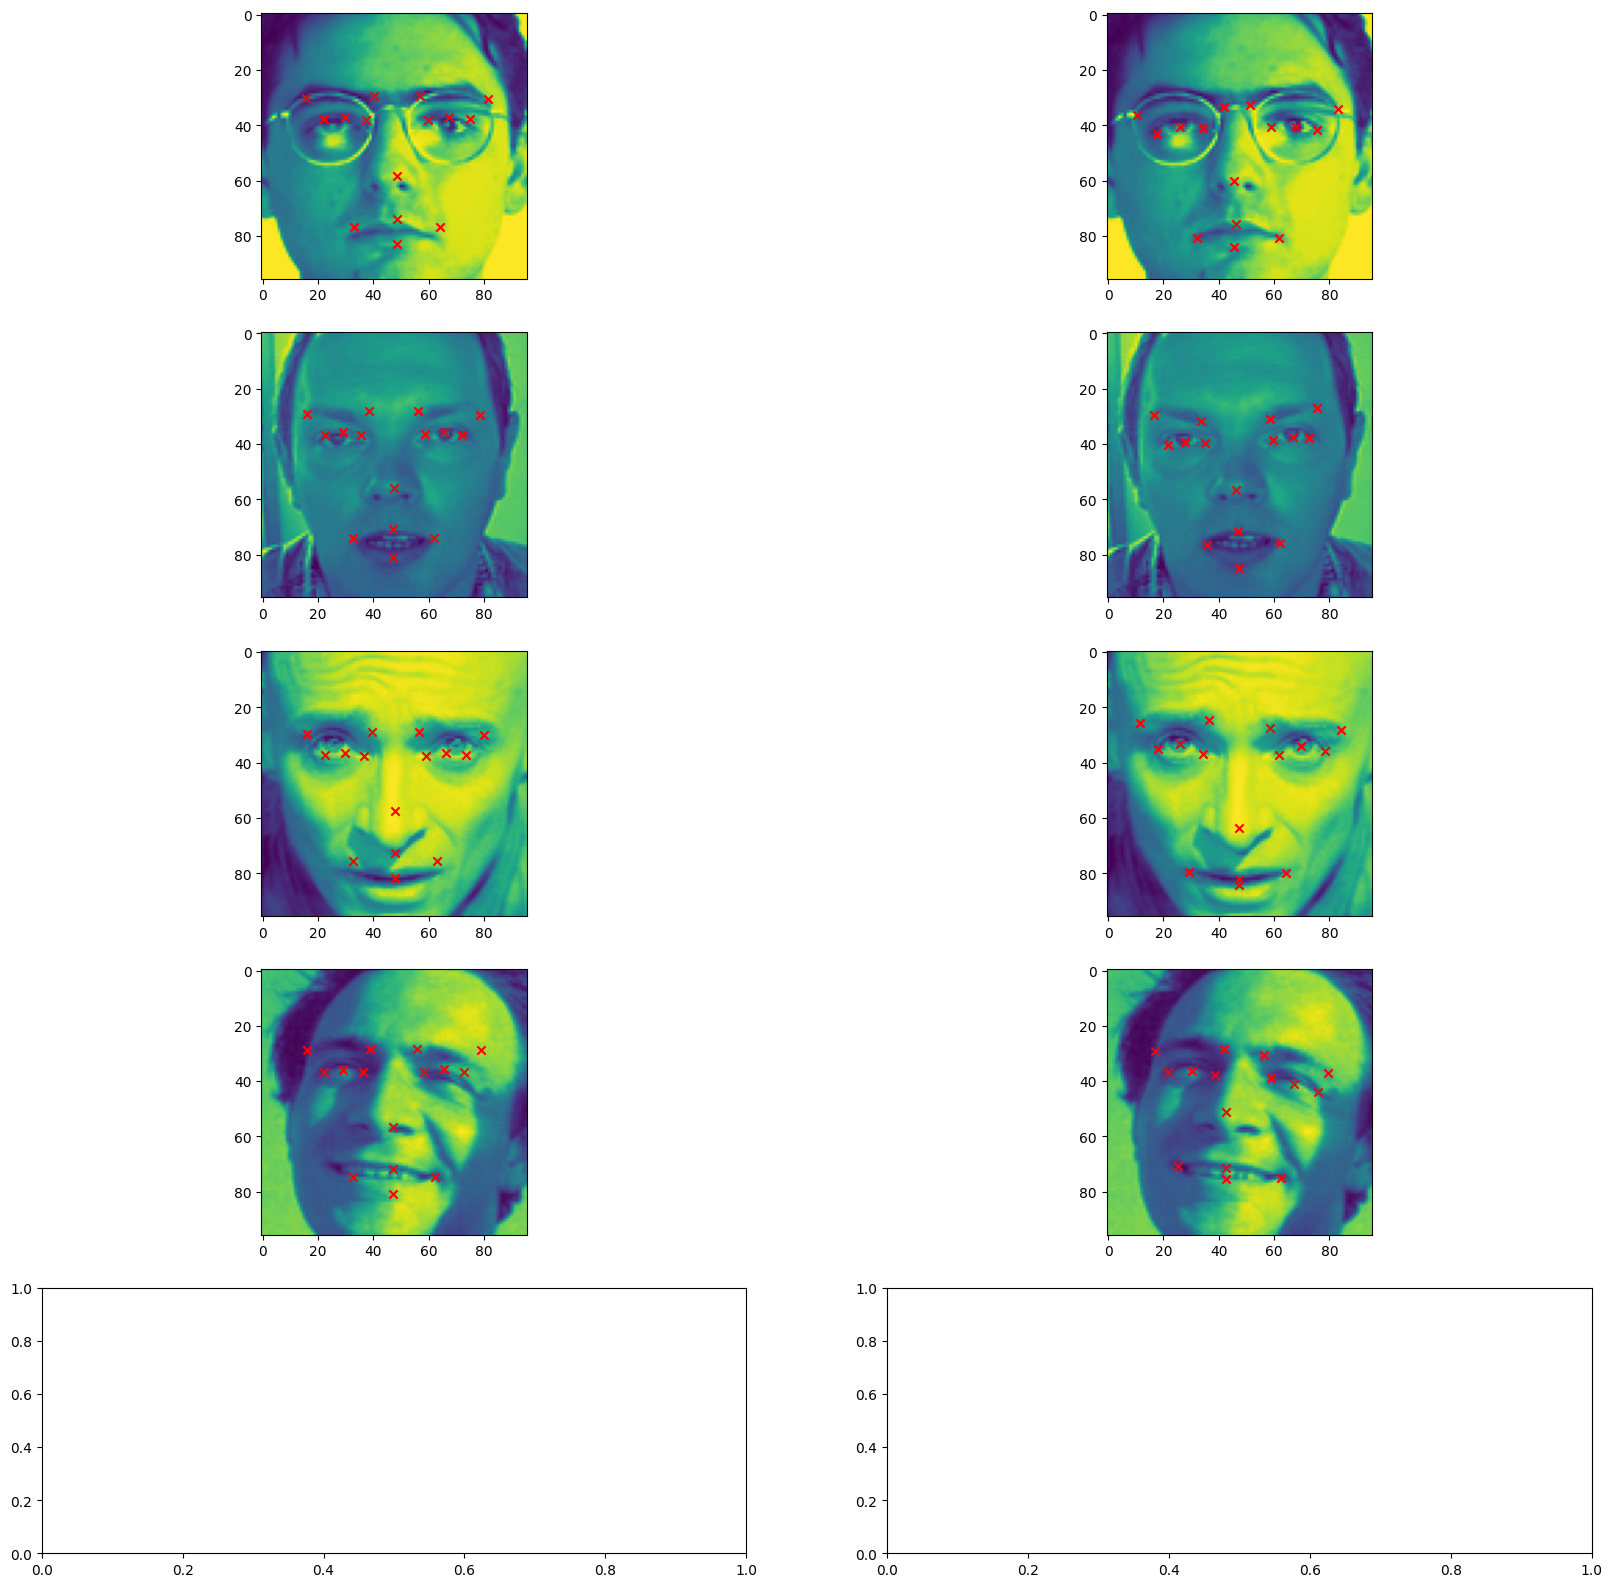

In [30]:
fig2,ax2=plt.subplots(nrows=5,ncols=2,figsize=(20,20))
for i in range(4):
    Pred=y2[i]
    Actual= y_test[i]
    Im=X_test[i]
    ax2[i,0].imshow(Im)
    ax2[i,1].imshow(Im)          
    ax2[i,0].scatter(Pred[0::2], Pred[1::2], c='red', marker='x')
    ax2[i,1].scatter(Actual[0::2], Actual[1::2], c='red', marker='x')
plt.savefig("tf_plt2.png")
plt.show()
